# Implementierung Algae Modell

## Bibs und packages 

In [2]:
from copy import deepcopy

In [3]:
%load_ext autoreload
%autoreload 2 
# from mempyDEB.DEBIBM import test
from mempyDEB.DEBIBM.simulators import * # imports functions to run models
from mempyDEB.DEBIBM.defaultparams import * # imports default parameters
from mempyDEB.DEBIBM.model import * #import model
import mempyDEB
#mempyDEB.__file__

using local version


'c:\\users\\valen\\desktop\\projekte\\phytoplankton_deb_ibm\\mempydeb\\mempyDEB\\__init__.py'

## Tes Algae model alone 

In [191]:
p = deepcopy(defaultparams_DEBIBM)
p.glb['Q0'] = 0.1
p.glb['X0'] = 2
p.glb['P0'] = 2
p.glb['Pdot_in'] = p.glb['D'] * p.glb['R0']
#p.glb['tspan'] = (0,14)
p.glb['N_0']= 50 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24
sim_weber = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss)
mout_weber, aout_weber = sim_weber 
mout_weber

100%|██████████| 3/3 [00:17<00:00,  5.85s/it]


,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,50,0.337500,0,0,0,0,0.0
1,1,0.0,2.098393,0.096356,1.967386,50,0.483899,0,0,0,0,0.0
2,2,3.5,40.274439,0.311010,0.340007,40,4.261898,0,11,0,0,0.0
3,3,7.0,144.420616,0.402681,0.006931,36,24.686410,0,17,0,0,0.0
4,4,10.5,105.318612,0.355267,0.013159,36,47.948036,0,17,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,350.0,139.289765,0.352673,0.007327,0,0.000000,29,27,0,2,0.0
102,102,353.5,139.289765,0.352673,0.007327,0,0.000000,29,27,0,2,0.0
103,103,357.0,139.289765,0.352673,0.007327,0,0.000000,29,27,0,2,0.0
104,104,360.5,139.289765,0.352673,0.007327,0,0.000000,29,27,0,2,0.0


Visualize Algae (X), Phosphorus content in the algae population (Q) and extern phosphorus (P). <br> 
Assumptions: <br>
- No Chemichal effect yet, <br>
- Constant phosphorus income 


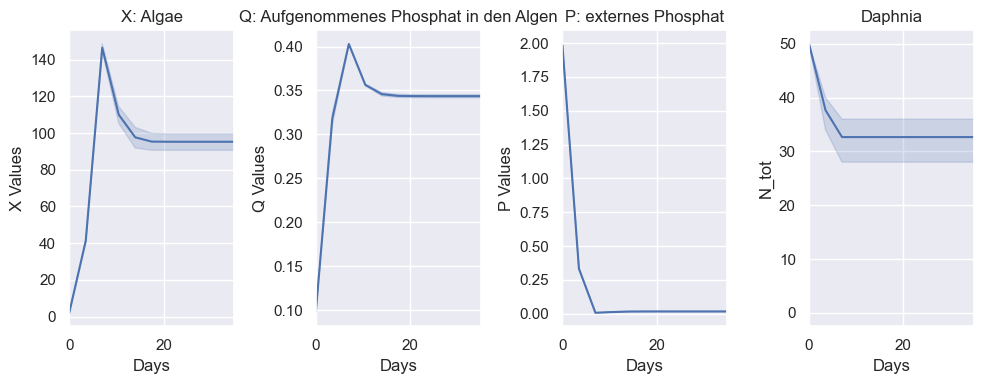

In [194]:
fig, ax = plt.subplots(ncols = 4, figsize = (10,4))

sns.lineplot(data=mout_weber, x='t_day',y='X', ax= ax[0])
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
#ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_weber, x='t_day',y='Q', ax= ax[1] )
ax[1].set_title('Q: Aufgenommenes Phosphat in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
#ax[1].legend(title='C_W', loc='upper right')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_weber, x='t_day',y='P', ax= ax[2] )
ax[2].set_title('P: externes Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
##ax[2].legend(title='C_W', loc='upper right')
ax[2].set_xlim(0,35)

sns.lineplot(data=mout_weber, x='t_day',y='N_tot', ax= ax[3] )
ax[3].set_title('Daphnia')
ax[3].set_xlabel('Days')
ax[3].set_ylabel('N_tot')
#ax[3].legend(title='C_W', loc='upper right')
ax[3].set_xlim(0,35)

plt.tight_layout()
plt.show()

Test and visualize effekt of chemichals in the the algae population: 

In [195]:
p_c = deepcopy(defaultparams_DEBIBM)
p_c.glb['Q0'] = 0.1
p_c.glb['X0'] = 2
p_c.glb['P0'] = 2
p_c.glb['Pdot_in'] = p.glb['D'] * p.glb['R0']
p_c.glb['tspan'] = (0,50)
p_c.glb['N_0']= 0 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24
C_W_vals = [0, 150, 300] 
sim_chem = exposure_DEBIBM(p_c, C_W_vals)
mout_c, aout_C = sim_chem 


100%|██████████| 3/3 [00:00<00:00,  7.00it/s]


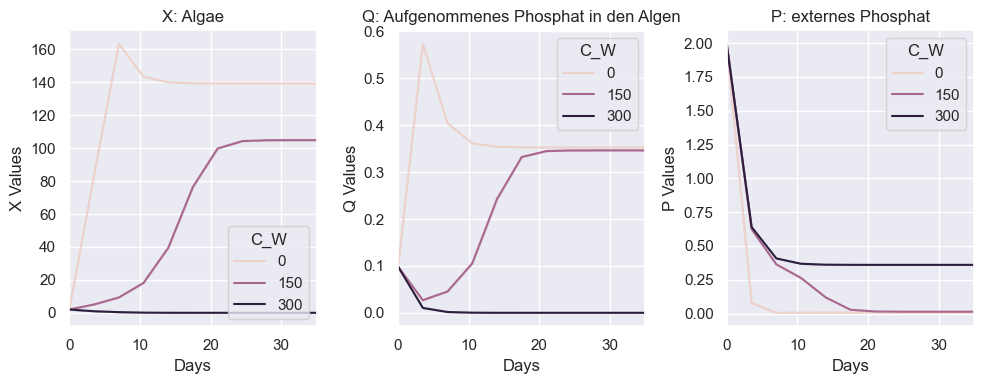

In [196]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_c, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Aufgenommenes Phosphat in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externes Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

## Algen und Daphnien Population

### Daphnia Algae Dynamics test1

Here we run the simulations with Daphnia population to see how the dynamics works between Daphnia, Algae and phosphorus

In [ ]:
p_dap = deepcopy(defaultparams_DEBIBM)
p_dap.glb['tspan'] = (0,450)
daph_vals = [10, 15, 30]
#daph_vals = [10, 30]
#p_dap.glb['N_0'] = 10 #No Daphnia 
p_dap.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_dap.glb['Pdot_in'] = 0.4
p_dap.glb['tres'] = 240
p_dap.glb['X0'] = 2
p_dap.glb['Q0'] = .1
p_dap.glb['P0'] = 2
p_dap.glb['C_W'] = 0

sim_dap_arr = []

for i in daph_vals: 
    p_dap.glb['N_0'] = i
    sim_dap = simulate_DEBIBM(p_dap) # runs the baseline model (a variant of DEBkiss)
    sim_dap_arr.append(sim_dap)
#mout_dap, aout_dap = sim_dap

 33%|███▎      | 1/3 [00:56<01:52, 56.17s/it]


KeyboardInterrupt: 

In [183]:
mout_dap, aout_dap = sim_dap_arr[0]
mout_dap

,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,10,0.067500,0,0,0,0,0
1,1,0.0,2.009839,0.099641,1.997650,10,0.070385,0,0,0,0,0
2,2,1.0,6.185259,0.055283,1.531147,10,2.158035,0,0,0,0,0
3,3,2.0,16.658603,0.129699,1.147060,10,1.383486,0,0,0,0,0
4,4,3.0,47.017774,0.451340,0.637733,8,0.975236,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,95.0,304.335631,0.796510,0.003490,4,18.589508,27,10,0,2,0
97,97,96.0,303.087066,0.796479,0.003521,4,21.542255,27,10,0,2,0
98,98,97.0,301.966241,0.796450,0.003550,4,24.262920,27,10,0,2,0
99,99,98.0,300.971968,0.796424,0.003576,4,26.724811,27,10,0,2,0


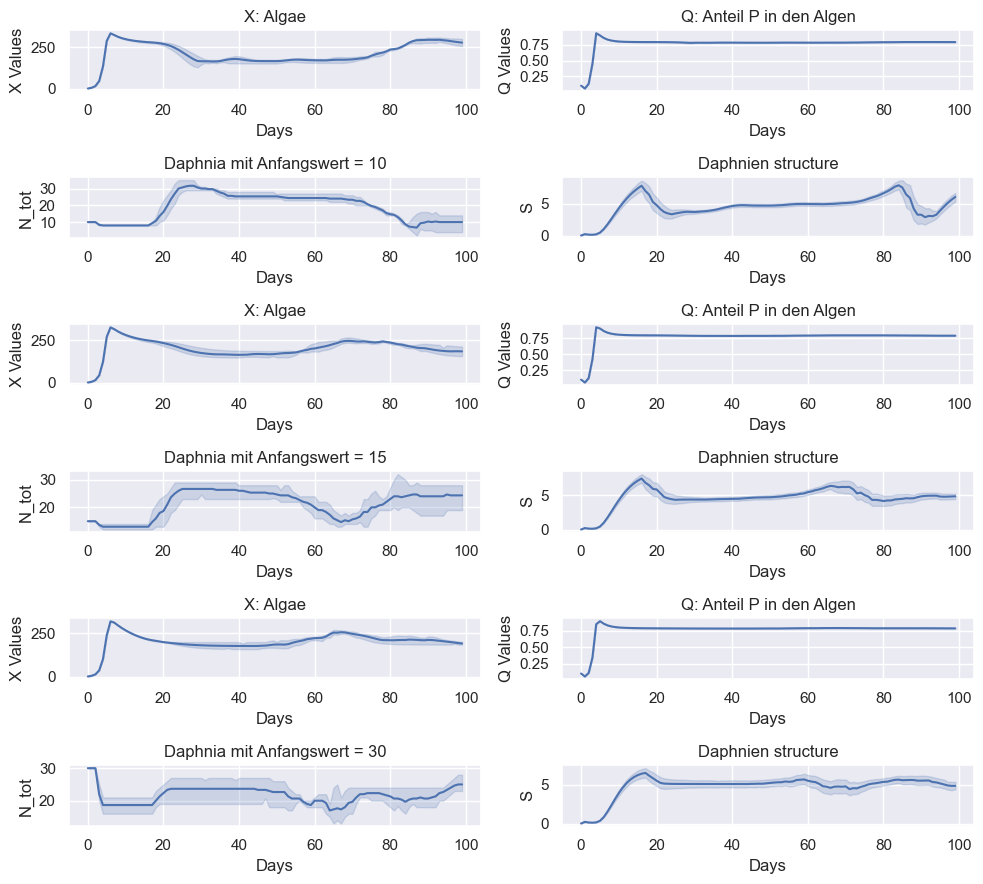

In [190]:
fig, ax = plt.subplots(ncols = 2, nrows= 6, figsize = (10,9))
row_index = 0
daph_ind = 0
for i in sim_dap_arr: 
    mout_dap, aout_dap = i 

    sns.lineplot(data=mout_dap, x='t_day',y='X', ax= ax[row_index,0] )
    ax[row_index,0].set_title('X: Algae')
    ax[row_index,0].set_xlabel('Days')
    ax[row_index,0].set_ylabel('X Values')
    #ax[row_plot1,0].set_xlim(0,365)

    sns.lineplot(data=mout_dap, x='t_day',y='Q', ax= ax[row_index,1] )
    ax[row_index,1].set_title('Q: Anteil P in den Algen')
    ax[row_index,1].set_xlabel('Days')
    ax[row_index,1].set_ylabel('Q Values')
    #ax[row_plot1,1].set_xlim(0,365)
    row_index += 1

    sns.lineplot(data=mout_dap, x='t_day',y='N_tot', ax= ax[row_index, 0] )
    ax[row_index, 0].set_title(f'Daphnia mit Anfangswert = {daph_vals[daph_ind]}')
    ax[row_index, 0].set_xlabel('Days')
    ax[row_index, 0].set_ylabel('N_tot')
    #ax[2].set_xlim(0,365)

    sns.lineplot(data=aout_dap, x='t_day',y='S', ax= ax[row_index, 1] )
    ax[row_index, 1].set_title('Daphnien structure')
    ax[row_index, 1].set_xlabel('Days')
    ax[row_index, 1].set_ylabel('S')
    #ax[3].set_xlim(0,365)
    row_index += 1
    daph_ind += 1


plt.tight_layout()
plt.show()

### Daphnia Algae dynamics test2

In [199]:
p_dap = deepcopy(defaultparams_DEBIBM)
p_dap.glb['tspan'] = (0,500)
daph_vals = [10, 30]
#daph_vals = [10, 30]
#p_dap.glb['N_0'] = 10 #No Daphnia 
p_dap.glb['data_collection_interval']=10 #in order to track shorter tie intervalls 
p_dap.glb['Pdot_in'] = 0.4
p_dap.glb['tres'] = 240
p_dap.glb['X0'] = 2
p_dap.glb['Q0'] = .1
p_dap.glb['P0'] = 2
p_dap.glb['C_W'] = 0

sim_dap_arr = []

for i in daph_vals: 
    p_dap.glb['N_0'] = i
    sim_dap = simulate_DEBIBM(p_dap) # runs the baseline model (a variant of DEBkiss)
    sim_dap_arr.append(sim_dap)


100%|██████████| 3/3 [07:49<00:00, 156.40s/it]


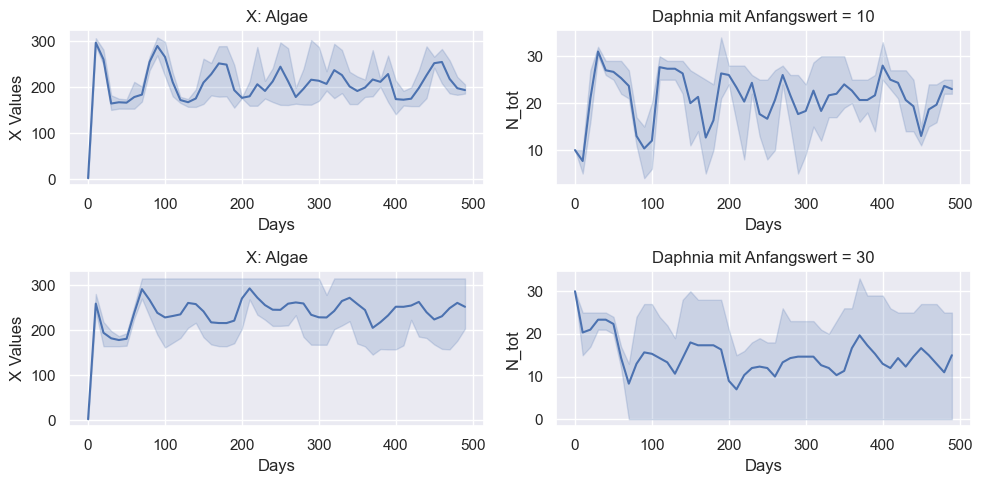

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize = (10,5))
row_index = 0
daph_ind = 0

for i in sim_dap_arr: 
    mout_dap, aout_dap = i 

    sns.lineplot(data=mout_dap, x='t_day',y='X', ax= ax[row_index,0] )
    ax[row_index,0].set_title('X: Algae')
    ax[row_index,0].set_xlabel('Days')
    ax[row_index,0].set_ylabel('X Values')
    #ax[row_plot1,0].set_xlim(0,365)

    sns.lineplot(data=mout_dap, x='t_day',y='N_tot', ax= ax[row_index, 1] )
    ax[row_index, 1].set_title(f'Daphnia mit Anfangswert = {daph_vals[daph_ind]}')
    ax[row_index, 1].set_xlabel('Days')
    ax[row_index, 1].set_ylabel('N_tot')
    #ax[2].set_xlim(0,365)

    row_index += 1
    daph_ind += 1


plt.tight_layout()
plt.show()

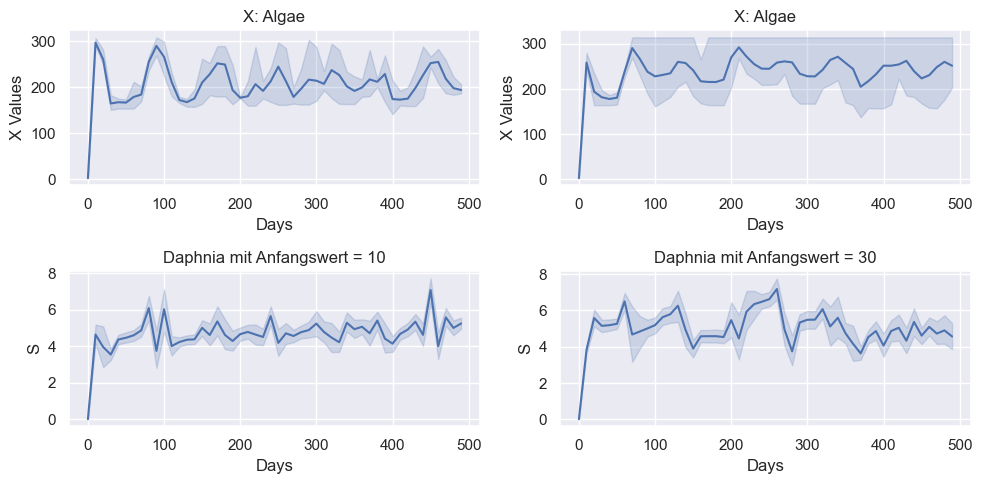

In [204]:
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize = (10,5))
col_index = 0
daph_ind = 0

for i in sim_dap_arr: 
    mout_dap, aout_dap = i 

    sns.lineplot(data=mout_dap, x='t_day',y='X', ax= ax[0,col_index] )
    ax[0,col_index].set_title('X: Algae')
    ax[0,col_index].set_xlabel('Days')
    ax[0,col_index].set_ylabel('X Values')
    #ax[row_plot1,0].set_xlim(0,365)

    sns.lineplot(data=aout_dap, x='t_day',y='S', ax= ax[1,col_index] )
    ax[1,col_index].set_title(f'Daphnia mit Anfangswert = {daph_vals[daph_ind]}')
    ax[1,col_index].set_xlabel('Days')
    ax[1,col_index].set_ylabel('S')
    #ax[2].set_xlim(0,365)

    col_index += 1
    daph_ind += 1


plt.tight_layout()
plt.show()

### Daphnia-Alage

In [ ]:
p_D = deepcopy(defaultparams_DEBIBM)
p_D.glb['tspan'] = (0,365)
p_D.glb['N_0'] = 10 
p_D.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_D.glb['Pdot_in'] = 0.4
p_D.glb['tres'] = 240
p_D.glb['X0'] = 2
p_D.glb['Q0'] = .1
p_D.glb['P0'] = 2
p_D.glb['C_W'] = 0
sim_daphnia = simulate_DEBIBM(p_D) # runs the baseline model (a variant of DEBkiss)
mout_daphnia, aout = sim_daphnia 

100%|██████████| 3/3 [04:20<00:00, 86.85s/it]


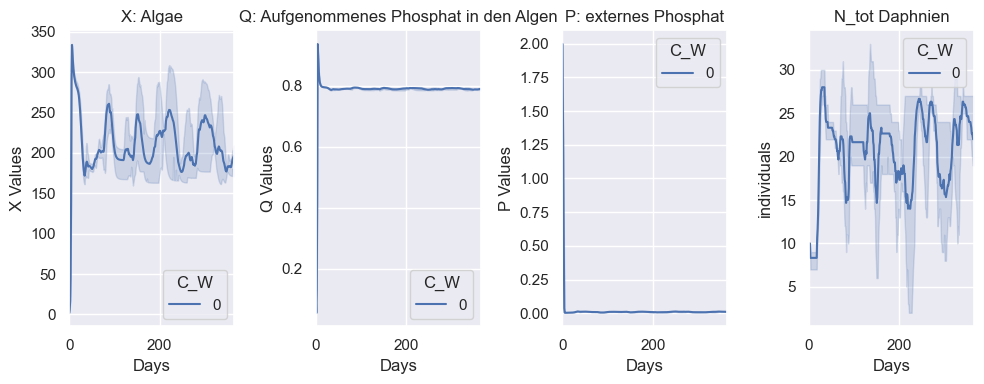

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

sns.lineplot(data=mout_daphnia, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,365)

sns.lineplot(data=mout_daphnia, x='t_day',y='N_tot', ax= ax[1], hue='C_W' )
ax[1].set_title('N_tot Daphnien')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('individuals')
ax[1].legend(title='C_W', loc='upper right')
ax[1].set_xlim(0,365)

plt.tight_layout()
plt.show()

### Introduction of chemicals 1

Here we test a very high imput of chemicals that also affect the algaes

In [10]:
p_D_C = deepcopy(defaultparams_DEBIBM)
C_Wvec = [0, 150, 300]
p_D_C.glb['tspan'] = (0,365)
p_D_C.glb['N_0'] = 10 #No Daphnia 
p_D_C.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_D_C.glb['Pdot_in'] = 0.4
p_D_C.glb['tres'] = 240
p_D_C.glb['X0'] = 2
p_D_C.glb['Q0'] = .1
p_D_C.glb['P0'] = 2
p_D_C.glb['C_W'] = 0
sim_daphnia_chem = exposure_DEBIBM(p_D_C, C_Wvec) # runs the baseline model (a variant of DEBkiss)
mout_daphnia_chem, aout = sim_daphnia_chem 

100%|██████████| 3/3 [00:12<00:00,  4.12s/it]


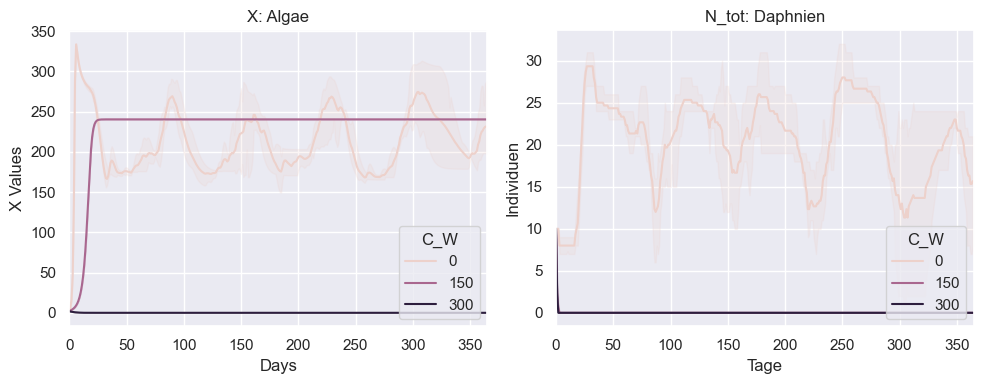

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

sns.lineplot(data=mout_daphnia_chem, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,365)

sns.lineplot(data = mout_daphnia_chem, x='t_day', y='N_tot', ax =ax[1], hue ='C_W')
ax[1].set_title('N_tot: Daphnien')
ax[1].set_xlabel('Tage')
ax[1].set_ylabel('Individuen')
ax[1].legend(title='C_W', loc='lower right')
ax[1].set_xlim(0,365)
plt.tight_layout()
plt.show()

### Introduction of Chemicals 2

Here we try a way shorter chemical imput that affect only Daphnia 

In [18]:
p_D_Cd = deepcopy(defaultparams_DEBIBM)
C_Wvec = [0, 0.1, 0.5]
p_D_Cd.glb['tspan'] = (0,365)
p_D_Cd.glb['N_0'] = 10 #No Daphnia 
p_D_Cd.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_D_Cd.glb['Pdot_in'] = 0.4
p_D_Cd.glb['tres'] = 240
p_D_Cd.glb['X0'] = 2
p_D_Cd.glb['Q0'] = .1
p_D_Cd.glb['P0'] = 2
p_D_Cd.glb['C_W'] = 0
sim_daphnia_chemd = exposure_DEBIBM(p_D_Cd, C_Wvec) # runs the baseline model (a variant of DEBkiss)
mout_daphnia_chemd, aout = sim_daphnia_chemd 

100%|██████████| 3/3 [00:12<00:00,  4.07s/it]


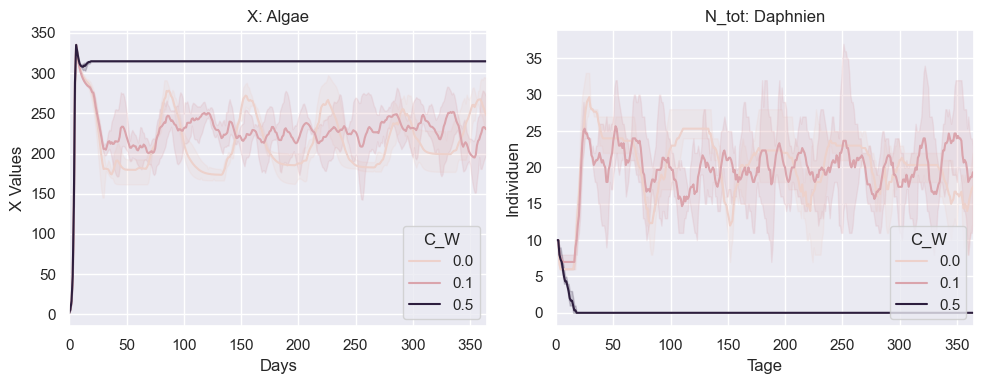

In [19]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

sns.lineplot(data=mout_daphnia_chemd, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,365)

sns.lineplot(data = mout_daphnia_chemd, x='t_day', y='N_tot', ax =ax[1], hue ='C_W')
ax[1].set_title('N_tot: Daphnien')
ax[1].set_xlabel('Tage')
ax[1].set_ylabel('Individuen')
ax[1].legend(title='C_W', loc='lower right')
ax[1].set_xlim(0,365)
plt.tight_layout()
plt.show()